<a href="https://colab.research.google.com/github/prithishsamanta/Electrical-Load-Balancer-Using-LSTMs-and-GRUs/blob/main/Final_Capstone_GRU_Test2_ERCOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **Capstone Project** -
  **Gated Neural Networks(GRU) and Long Short Term Memory (LSTM) Implementation**

  The following code is written to perform time series analysis on the Electrical Reliability Council of Texas(ERCOT) Dataset. This dataset contains information on the cost of energy for farmers while accounting for their environmental conditions. The dataset involves the following columns of data:


  1.   DryBulb
  2.   DewPnt  
  3.   WetBulb
  4.   Humidity  
  5.   ElecPrice  
  6.   SYSLoad   



Installing all the packages needed to run the code

1.   Pandas - Python's Pandas package is used to manipulate data sets. It offers tools for data exploration, cleaning, analysis, and manipulation.


2.   Numpy - The Python package NumPy is used to manipulate arrays. Moreover, it has matrices, fourier transform, and functions for working in the area of linear algebra. The equivalent of arrays in Python are lists, although they take a long time to execute. The goal of NumPy is to offer array objects that are up to 50 times faster than conventional Python lists. The NumPy array object is referred to as ndarray, and it has a number of supporting methods that make using ndarray relatively simple. In data research, where speed and resources are crucial, arrays are employed a lot.

3.   TensorFlow - TensorFlow is a symbolic math library used for neural networks and is best suited for dataflow programming across a range of tasks.

4.   Keras - Python-based Keras is a powerful high-level neural network Application Programming Interface (API). This enables quick deep neural network experimentation. Low-level computations are passed off to the Backend, a different library, rather than being handled by it.


In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
import tensorflow as tf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv('/content/ercot-dataset.csv')
# df.head()

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = 'drive/My Drive/Capstone'

In [ ]:
df = pd.read_csv(path+'/capstone_dataset_ERCOT.csv')
df.head(10)

,Date,DryBulb,DewPnt,WetBulb,Humidity,ElecPrice,Day,Month,Year,Minutes,SYSLoad
0,01/01/2006 0:30,23.9,21.65,22.40,87.5,19.67,1,1,2006,30,8013.27833
1,01/01/2006 1:00,23.9,21.70,22.40,88.0,18.56,1,1,2006,60,7726.89167
2,01/01/2006 1:30,23.8,21.65,22.35,88.0,19.09,1,1,2006,90,7372.85833
3,01/01/2006 2:00,23.7,21.60,22.30,88.0,17.40,1,1,2006,120,7071.83333
4,01/01/2006 2:30,23.7,21.60,22.30,88.0,17.00,1,1,2006,150,6865.44000
5,01/01/2006 3:00,23.7,21.60,22.30,88.0,17.00,1,1,2006,180,6685.92667
6,01/01/2006 3:30,23.6,21.65,22.30,89.0,17.00,1,1,2006,210,6548.62833
7,01/01/2006 4:00,23.5,21.70,22.30,90.0,16.92,1,1,2006,240,6487.83667
8,01/01/2006 4:30,23.5,21.70,22.30,90.0,15.20,1,1,2006,270,6449.17833
9,01/01/2006 5:00,23.5,21.70,22.30,90.0,14.99,1,1,2006,300,6388.27833


We are considering the SYSLoad, DryBulb, DewPnt, Humidity and ElecPrice columns for performing the task.

features_considered is a variable that stores a list of the column names that we are considering for the experiment.

We are then storing the selected columns in a variable named features, and date is set as the index of the dataset.

In [ ]:
# Forecasting for Multivariate Time Series

features_considered = ['SYSLoad', 'DryBulb', 'DewPnt', 'WetBulb', 'Humidity', 'ElecPrice']

In [ ]:
features = df[features_considered]
features.index = df['Date']
features.head()

,SYSLoad,DryBulb,DewPnt,WetBulb,Humidity,ElecPrice
Date,,,,,,
01/01/2006 0:30,8013.27833,23.9,21.65,22.40,87.5,19.67
01/01/2006 1:00,7726.89167,23.9,21.70,22.40,88.0,18.56
01/01/2006 1:30,7372.85833,23.8,21.65,22.35,88.0,19.09
01/01/2006 2:00,7071.83333,23.7,21.60,22.30,88.0,17.40
01/01/2006 2:30,6865.44000,23.7,21.60,22.30,88.0,17.00


Hare all the column data is converted to float32 type for easy processing

In [ ]:
values = features.values
values = values.astype('float32')

The above values of the columns are at drastically different scales. To analyze trends and patterns of the data better we have scaled the data using the MINMAX Scaling Algorithm.

All values in a MinMax normalisation are scaled between [0,1], where [0] is the minimum value and [1] is the maximum value. The formula for Min-Max Normalization is:

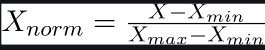

The MinMaxScaler is imported from the sklearn module

In [ ]:
# normalizing input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
n_scaled = pd.DataFrame(scaled)

In [ ]:
n_scaled.head(4)

,0,1,2,3,4,5
0,0.286575,0.503741,0.921779,0.836134,0.865591,0.027667
1,0.253941,0.503741,0.923313,0.836134,0.870968,0.027559
2,0.213599,0.501247,0.921779,0.834034,0.870968,0.027610
3,0.179297,0.498753,0.920245,0.831933,0.870968,0.027446


**create_timeseries_data() function**

The below function takes in 3 parameters, i.e. the dataset, the column to be predicted, and the column after the column to be predicted. The function returns a new variable which contains the dataset concatenated with the future predtiction values.

The final_df(new variable) variable has 7 columns. First six of these columns are the intput given to the LSTM at time (t-1). This involves the dewpnt, wetbulb, humidity, etc value at time (t-1). The last column contains the to be predicted SYSLoad value at time (t).

The structure of the new variable can be seen below. (printed the new dataset under the name reframed_df)



In [ ]:
def create_timesseries_data(dataset, lookback=1, predicted_col=1):
    temp=dataset.copy()
    temp["id"]= range(1, len(temp)+1)
    temp = temp.iloc[:-lookback, :]  # copies all the values to the temp variable
    temp.set_index('id', inplace =True)  # makes id the index column of the dataset
    predicted_value=dataset.copy()  # copies all the values to the new variable
    predicted_value = predicted_value.iloc[lookback:,predicted_col]  # sets the 0th coulmn as the column to be predicted
    predicted_value.columns=["Predcited"]
    predicted_value= pd.DataFrame(predicted_value)

    predicted_value["id"]= range(1, len(predicted_value)+1)  # adding the id column to the predicted value
    predicted_value.set_index('id', inplace =True)
    final_df= pd.concat([temp, predicted_value], axis=1)  # concats the 2 variables to 1, the new variable has 7 columns
    #  final_df has (t-1) time data in the first 6 columns, which is used to predict the load at time (t), present in the 7th column

    return final_df

In [ ]:
reframed_df= create_timesseries_data(n_scaled, 1,0)
reframed_df.fillna(0, inplace=True)

reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var1(t)']
print(reframed_df.head(4))

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)
id                                                                            
1    0.286575   0.503741   0.921779   0.836134   0.865591   0.027667  0.253941
2    0.253941   0.503741   0.923313   0.836134   0.870968   0.027559  0.213599
3    0.213599   0.501247   0.921779   0.834034   0.870968   0.027610  0.179297
4    0.179297   0.498753   0.920245   0.831933   0.870968   0.027446  0.155779


**Dickey-Fuller Test**

if Pvalue(> 0.05) -> Data is not stationary

else if Pvalue( < 0.05) Data is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adftest=adfuller(reframed_df.iloc[:, 0:1])
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  0.0


**Training, Validation and Testing Split**

In the next step, we have split the data in 3 sets. One is the training set, which contains approximatly 80% of the data (i.e. 70118 rows of the dataset). The second set is the validate set which contains 10% of the data (i.e. the remaining 8764 rows of data), and the third set is the testing set which contains the rest 10% of the data (i.e. the remaining 8764 rows of data).

The LSTM and GRU models will be trained using the training data, and validated using the validate data. The model will then be tested using the test_X, and the predicted SYSLoad values will then be compared to the test_Y values, which are the actual values.

In [ ]:
# split into train, validate and test sets

s_values = reframed_df.values
training_sample = int( len(df) *0.8)
val_sample = int( len(df) * 0.1) + training_sample
train = s_values[:training_sample, :]
val = s_values[training_sample:val_sample, :]
test = s_values[val_sample:, :]

# split into input and outputs

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
val_X, val_y = val[:, :-1], val[:, -1]
print(test)

[[0.7240829  0.14339153 0.40337425 ... 0.6989247  0.03008775 0.72022   ]
 [0.72022    0.14962594 0.404908   ... 0.68817204 0.02974871 0.7165019 ]
 [0.7165019  0.15710725 0.40337425 ... 0.672043   0.02971072 0.70723766]
 ...
 [0.34296626 0.46758112 0.84202456 ... 0.8010753  0.02833118 0.33213866]
 [0.33213866 0.4638404  0.8404908  ... 0.8064516  0.02820355 0.30486482]
 [0.30486482 0.457606   0.84202456 ... 0.82258064 0.02830195 0.29228133]]


In [ ]:
print("train_X:", train_X, "\n\ntrain_y:", train_y, "\n\nval_X:", val_X, "\n\nval_y:", val_y, "\n\ntest_X:", test_X, "\n\ntest_y:", test_y)

train_X: [[0.28657454 0.50374067 0.92177916 0.83613443 0.8655914  0.02766674]
 [0.25394082 0.50374067 0.9233129  0.83613443 0.87096775 0.0275586 ]
 [0.21359879 0.5012469  0.92177916 0.8340336  0.87096775 0.02761023]
 ...
 [0.35835862 0.49875316 0.8803681  0.79831934 0.79569894 0.02864391]
 [0.33371127 0.49127182 0.8834356  0.7962185  0.8172043  0.02840035]
 [0.3164888  0.48379055 0.8865031  0.7941176  0.8387097  0.02814217]] 

train_y: [0.25394082 0.21359879 0.17929703 ... 0.33371127 0.3164888  0.3174643 ] 

val_X: [[0.3174643  0.48379055 0.89417183 0.80042017 0.8548387  0.02805449]
 [0.322208   0.48379055 0.90184057 0.8067227  0.87096775 0.02796973]
 [0.29908985 0.48628435 0.89417183 0.80252105 0.8494624  0.02787036]
 ...
 [0.70022637 0.11221945 0.39570552 0.17226893 0.75268817 0.02907745]
 [0.7287081  0.12468828 0.398773   0.18487397 0.7311828  0.02955386]
 [0.72233146 0.13715711 0.4018405  0.19747901 0.70967746 0.02949833]] 

val_y: [0.322208   0.29908985 0.28595483 ... 0.7287081  0

In [ ]:
# reshape input to be 3D [samples, time steps, features]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(70118, 1, 6) (70118,) (8764, 1, 6) (8764,) (8765, 1, 6) (8765,)


**LSTM MODEL**

Our data has undergone preprocessing and its is convererted to the required format. Now is the time to develop our LSTM Model. We're going to build a sequential, multi-layered LSTM model. Our model will contain three LSTM layers, followed by a dense layer that forecasts the future Electricity Load/ Price.

Inorder to build an LSTM model, we start by adding a sequential layer. This is followed by the add method, which is used to add more layers on top of the Sequential Layer.

The first parameter to the LSTM layer is the number of neurons or nodes that we want in the layer(75 in our case).

The second parameter is return_sequences, which is set to true since we will add more layers to the model.

The first parameter to the input_shape is the number of time steps while the last parameter is the number of indicators.

At the end we add a Dense Layer. The number of neurons on the dense layer is set to 1 as we have to predict a single output value.

Finally, we need to compile our LSTM before we can train it on the training data. We have used the mean absolute error(MAE) as loss function and to reduce the loss or to optimize the algorithm, we use the adam optimizer.

In [ ]:
# LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(75, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.2))

model_lstm.add(LSTM(units=30, return_sequences=True))
# model.add(Dropout(0.2))

model_lstm.add(LSTM(units=30))
# model.add(Dropout(0.2))

model_lstm.add(Dense(units=1))

model_lstm.compile(loss='mae', optimizer='adam')

**LOSS FUNCTION**

The loss function is the function that computes the distance between the current output of the algorithm and the expected output. It’s a method to evaluate how your algorithm models the data. It’s a method of evaluating how well your algorithm models your dataset.

**OPTIMIZER**

An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rates. Thus, it helps in reducing the overall loss and improving accuracy.

The adam optimizer shows the best accuracy in a satisfactory amount of time.

RMSprop shows similar accuracy to that of Adam but with a comparatively much larger computation time.

The adam optimizer has several benefits, due to which it is used widely. It is adapted as a benchmark for deep learning papers and recommended as a default optimization algorithm. Moreover, the algorithm is straightforward to implement, has a faster running time, low memory requirements, and requires less tuning than any other optimization algorithm.

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 75)             24600     
                                                                 
 lstm_1 (LSTM)               (None, 1, 30)             12720     
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 44,671
Trainable params: 44,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
history_lstm = model_lstm.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(val_X, val_y),  shuffle=False)

Epoch 1/10
1096/1096 [==============================] - 10s 5ms/step - loss: 0.0465 - val_loss: 0.0242
Epoch 2/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0215 - val_loss: 0.0217
Epoch 3/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0213 - val_loss: 0.0222
Epoch 4/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0210 - val_loss: 0.0235
Epoch 5/10
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0212 - val_loss: 0.0226
Epoch 6/10
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0210 - val_loss: 0.0227
Epoch 7/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0210 - val_loss: 0.0232
Epoch 8/10
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0211 - val_loss: 0.0233
Epoch 9/10
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0210 - val_loss: 0.0235
Epoch 10/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.02

**GRU MODEL**

We are going to build a sequential, multi-layered GRU model. Our model will contain three GRU layers, followed by a dense layer that forecasts the future Electricity Load/ Price.

The structure of our GRU model is similar to the LSTM model created above.

In [ ]:
# GRU

model_gru = Sequential()
model_gru.add(GRU(75, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model_gru.add(GRU(units=30, return_sequences=True))
model_gru.add(GRU(units=30))
model_gru.add(Dense(units=1))

model_gru.compile(loss='mae', optimizer='adam')

In [ ]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 75)             18675     
                                                                 
 gru_1 (GRU)                 (None, 1, 30)             9630      
                                                                 
 gru_2 (GRU)                 (None, 30)                5580      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 33,916
Trainable params: 33,916
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(val_X, val_y), shuffle=False)

Epoch 1/10
1096/1096 [==============================] - 10s 5ms/step - loss: 0.0335 - val_loss: 0.0208
Epoch 2/10
1096/1096 [==============================] - 5s 4ms/step - loss: 0.0215 - val_loss: 0.0207
Epoch 3/10
1096/1096 [==============================] - 5s 4ms/step - loss: 0.0213 - val_loss: 0.0208
Epoch 4/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0213 - val_loss: 0.0218
Epoch 5/10
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0214 - val_loss: 0.0241
Epoch 6/10
1096/1096 [==============================] - 5s 4ms/step - loss: 0.0212 - val_loss: 0.0210
Epoch 7/10
1096/1096 [==============================] - 5s 4ms/step - loss: 0.0211 - val_loss: 0.0217
Epoch 8/10
1096/1096 [==============================] - 4s 4ms/step - loss: 0.0211 - val_loss: 0.0239
Epoch 9/10
1096/1096 [==============================] - 5s 4ms/step - loss: 0.0211 - val_loss: 0.0248
Epoch 10/10
1096/1096 [==============================] - 5s 4ms/step - loss: 0.02

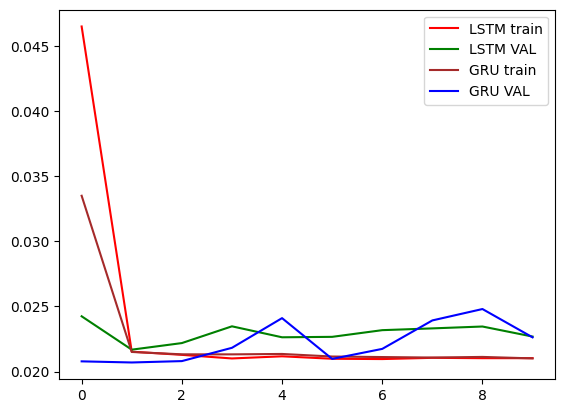

In [ ]:
pyplot.plot(history_lstm.history['loss'], label='LSTM train', color='red')
pyplot.plot(history_lstm.history['val_loss'], label='LSTM VAL', color= 'green')
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU VAL', color='blue')
pyplot.legend()
pyplot.show()

In [ ]:
predicted_lstm = model_lstm.predict(test_X)
actual_lstm = test_y

274/274 [==============================] - 1s 1ms/step


In [ ]:
predicted_gru = model_gru.predict(test_X)
actual_gru = test_y

274/274 [==============================] - 1s 1ms/step


In [ ]:
print(predicted_gru)
print(actual_gru)

[[0.72926235]
 [0.725594  ]
 [0.7220597 ]
 ...
 [0.3437302 ]
 [0.3328896 ]
 [0.30568805]]
[0.72022    0.7165019  0.70723766 ... 0.33213866 0.30486482 0.29228133]


In [ ]:
predicted_lstm = np.reshape(predicted_lstm, (8765, ))
print(predicted_lstm)
predicted_gru = np.reshape(predicted_gru, (8765, ))
print(predicted_gru)

[0.72211236 0.71870863 0.71544534 ... 0.3444807  0.33335888 0.30544135]
[0.72926235 0.725594   0.7220597  ... 0.3437302  0.3328896  0.30568805]


In [ ]:
scaled_gru = scaled
scaled_lstm = scaled

This function is used to convert the predicted values to its original value

In [ ]:
def reverse_predicted_values(dataset, start_pos, predicted, scaler):
    cur_pos = start_pos
    for x in predicted:
      dataset[cur_pos][0] = x
      cur_pos = cur_pos + 1

    inv_vals = scaler.inverse_transform(dataset)
    vals = inv_vals[val_sample: , 0:1]
    return vals

In [ ]:
vals_lstm = reverse_predicted_values(scaled_lstm, val_sample + 1, predicted_lstm, scaler)
print(vals_lstm)

[[11852.76 ]
 [11835.467]
 [11805.597]
 ...
 [ 8521.45 ]
 [ 8423.848]
 [ 8178.849]]


In [ ]:
vals_gru = reverse_predicted_values(scaled_gru, val_sample + 1, predicted_gru, scaler)
print(vals_gru)

[[11852.76  ]
 [11898.215 ]
 [11866.021 ]
 ...
 [ 8514.864 ]
 [ 8419.7295]
 [ 8181.0146]]


In [ ]:
act_vals = values[val_sample: , 0:1]
print(act_vals)

[[11852.76]
 [11818.86]
 [11786.23]
 ...
 [ 8413.14]
 [ 8173.79]
 [ 8063.36]]


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

mape_lstm = sqrt(mean_absolute_percentage_error(vals_lstm, act_vals))
mae_lstm = mean_absolute_error(act_vals, vals_lstm)
mape_gru = sqrt(mean_absolute_percentage_error(vals_gru, act_vals))
mae_gru = mean_absolute_error(act_vals, vals_gru)

In [ ]:
print("MEAN ABSOLUTE PERCENTAGE ERROR and MEAN ABSOLUTE ERROR of CONVERTED PREDICTION")
print("mape_model_lstm: ", mape_lstm)
print("mae_model_lstm: ", mae_lstm)
print("mape_model_gru: ", mape_gru)
print("mae_model_gru: ", mae_gru)

MEAN ABSOLUTE PERCENTAGE ERROR and MEAN ABSOLUTE ERROR of CONVERTED PREDICTION
mape_model_lstm:  1.505724872465112
mae_model_lstm:  193.34746
mape_model_gru:  1.525529439961996
mae_model_gru:  198.62659


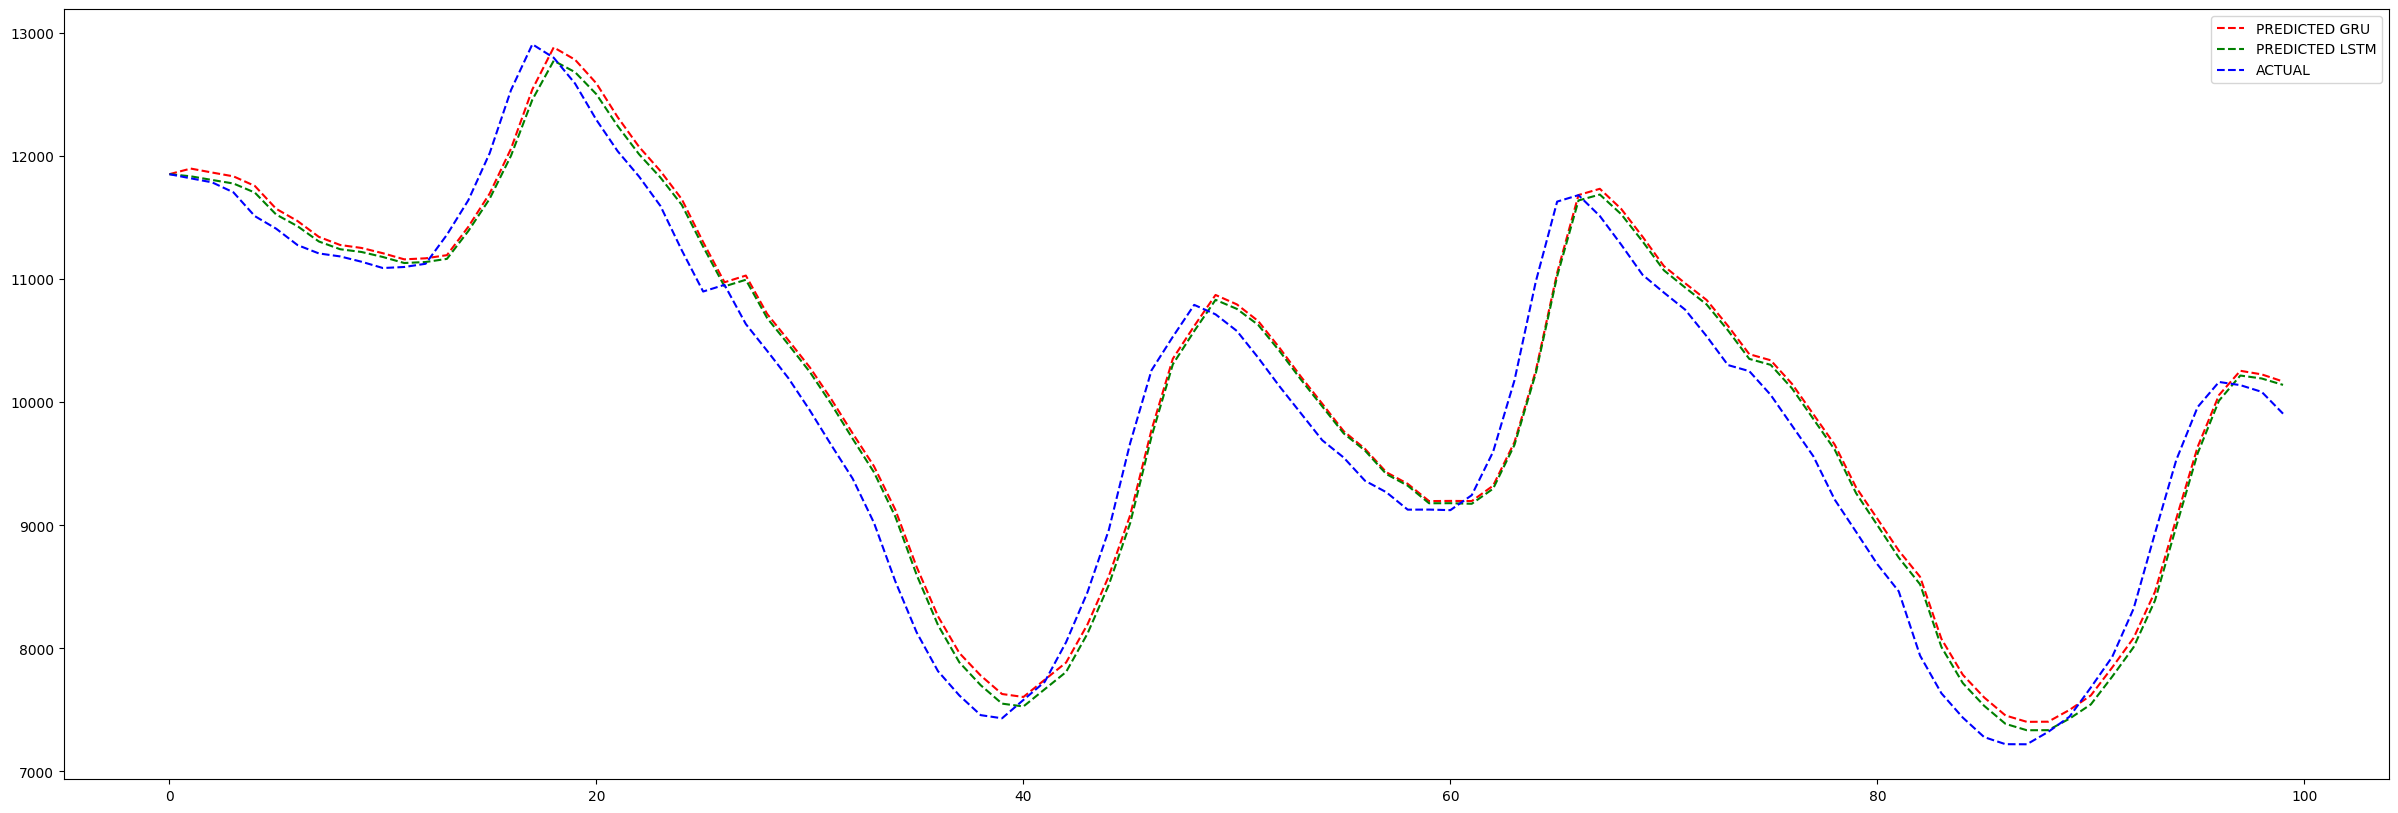

In [ ]:
pyplot.figure(figsize=(30,10))
pyplot.plot(vals_gru[:100],'r--',label="PREDICTED GRU")
pyplot.plot(vals_lstm[:100],'g--',label="PREDICTED LSTM")
pyplot.plot(act_vals[:100],'b--',label="ACTUAL")
pyplot.legend()
pyplot.show()

**Turning Points**

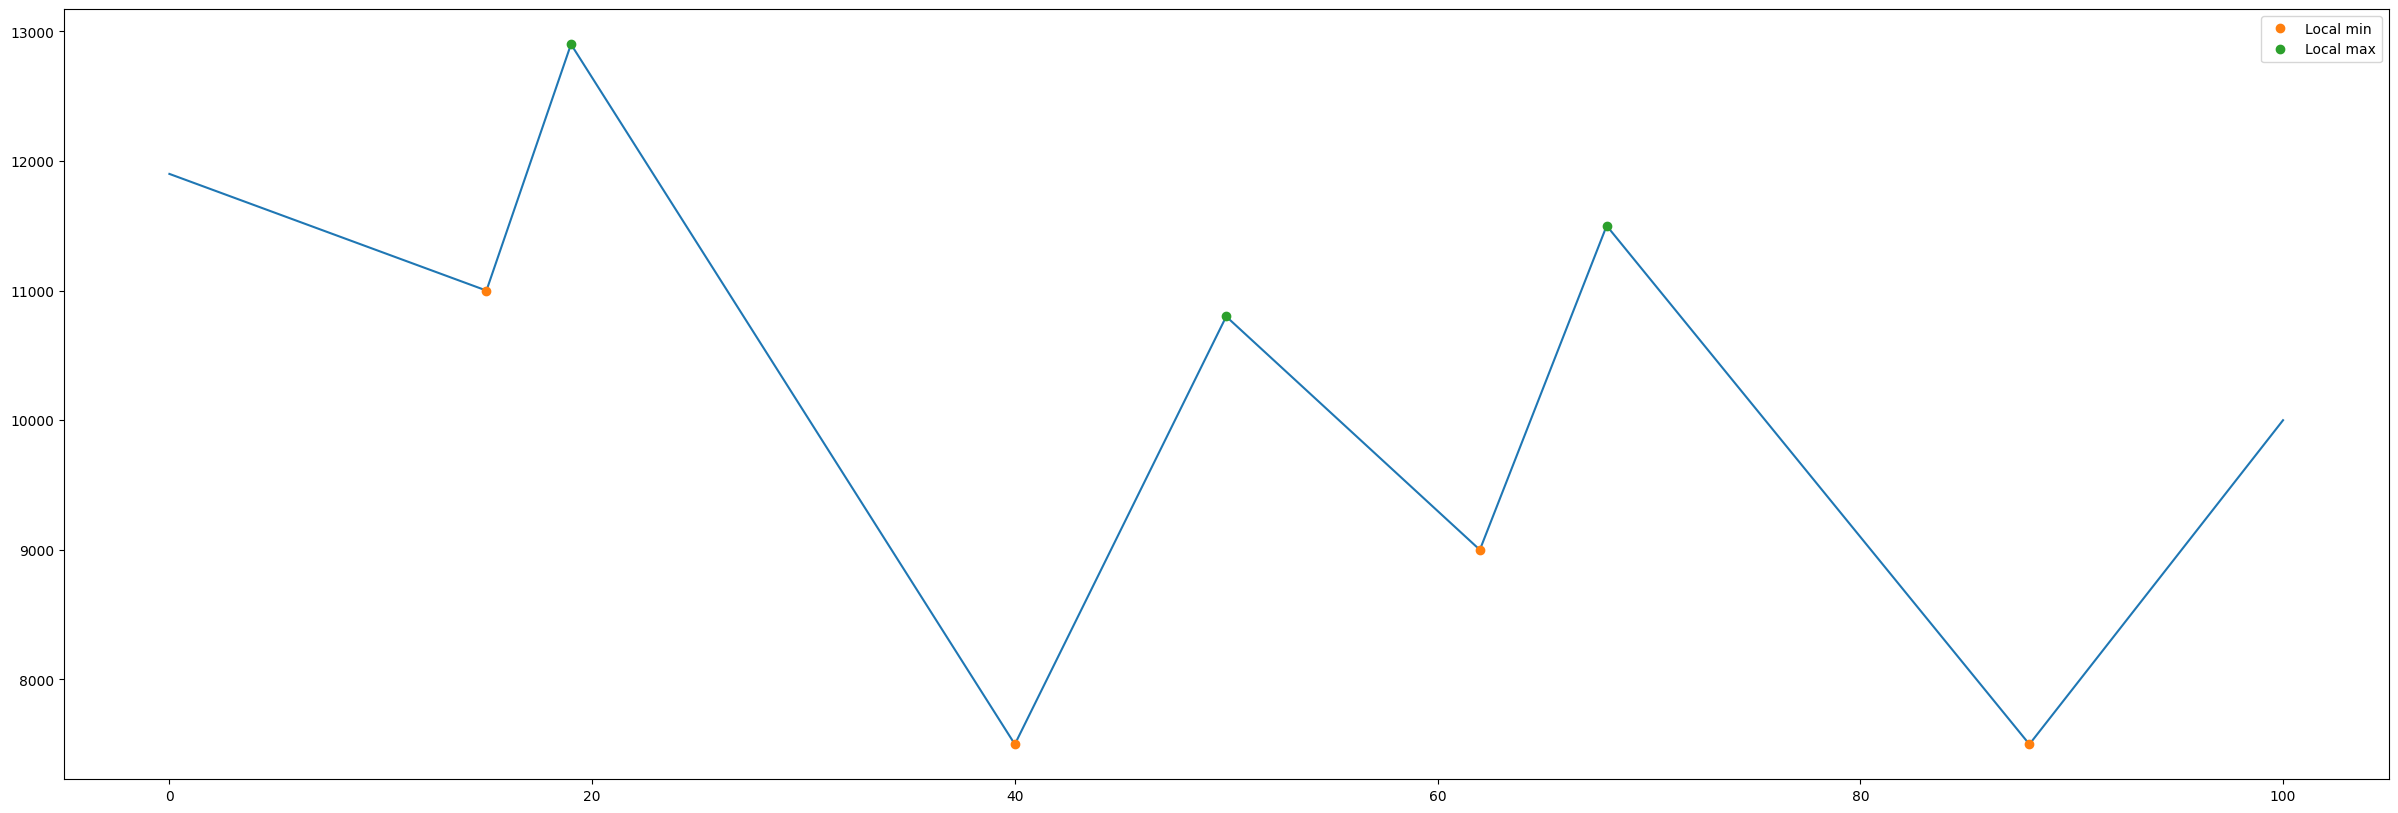

In [ ]:
x = np.array([0,15,19,40,50,62,68,88,100])
y = np.array([11900,11000,12900,7500,10800,9000,11500,7500,10000])
local_min = (np.diff(np.diff(y))>0).nonzero()[0]+1
local_max = (np.diff(np.diff(y))<0).nonzero()[0]+1
plt.figure(figsize=(30,10))
plt.plot(x,y)
plt.plot(x[local_min],y[local_min],'o',label="Local min")
plt.plot(x[local_max],y[local_max],'o',label="Local max")
plt.legend()
plt.show()

In [ ]:
model_lstm_1 = Sequential()
model_lstm_1.add(LSTM(75, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.2))

model_lstm_1.add(Dense(units=1))

model_lstm_1.compile(loss='mae', optimizer='adam')

In [ ]:
model_lstm_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 75)                24600     
                                                                 
 dense_2 (Dense)             (None, 1)                 76        
                                                                 
Total params: 24,676
Trainable params: 24,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm_1 = model_lstm_1.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(val_X, val_y),  shuffle=False)

Epoch 1/10
1096/1096 [==============================] - 8s 5ms/step - loss: 0.0379 - val_loss: 0.0212
Epoch 2/10
1096/1096 [==============================] - 3s 3ms/step - loss: 0.0211 - val_loss: 0.0212
Epoch 3/10
1096/1096 [==============================] - 4s 3ms/step - loss: 0.0210 - val_loss: 0.0213
Epoch 4/10
1096/1096 [==============================] - 5s 4ms/step - loss: 0.0210 - val_loss: 0.0211
Epoch 5/10
1096/1096 [==============================] - 4s 3ms/step - loss: 0.0209 - val_loss: 0.0211
Epoch 6/10
1096/1096 [==============================] - 4s 3ms/step - loss: 0.0209 - val_loss: 0.0210
Epoch 7/10
1096/1096 [==============================] - 4s 3ms/step - loss: 0.0209 - val_loss: 0.0210
Epoch 8/10
1096/1096 [==============================] - 7s 6ms/step - loss: 0.0208 - val_loss: 0.0210
Epoch 9/10
1096/1096 [==============================] - 4s 3ms/step - loss: 0.0209 - val_loss: 0.0213
Epoch 10/10
1096/1096 [==============================] - 4s 3ms/step - loss: 0.020

In [ ]:
model_lstm_2 = Sequential()
model_lstm_2.add(LSTM(75, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.2))

model_lstm_2.add(LSTM(units=30))
# model.add(Dropout(0.2))

model_lstm_2.add(Dense(units=1))

model_lstm_2.compile(loss='mae', optimizer='adam')

In [ ]:
model_lstm_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 75)             24600     
                                                                 
 lstm_5 (LSTM)               (None, 30)                12720     
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 37,351
Trainable params: 37,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm_2 = model_lstm_2.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(val_X, val_y),  shuffle=False)

Epoch 1/10
1096/1096 [==============================] - 13s 8ms/step - loss: 0.0404 - val_loss: 0.0215
Epoch 2/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0214 - val_loss: 0.0208
Epoch 3/10
1096/1096 [==============================] - 7s 6ms/step - loss: 0.0211 - val_loss: 0.0218
Epoch 4/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0210 - val_loss: 0.0216
Epoch 5/10
1096/1096 [==============================] - 6s 5ms/step - loss: 0.0210 - val_loss: 0.0217
Epoch 6/10
1096/1096 [==============================] - 6s 6ms/step - loss: 0.0210 - val_loss: 0.0217
Epoch 7/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0209 - val_loss: 0.0217
Epoch 8/10
1096/1096 [==============================] - 7s 6ms/step - loss: 0.0209 - val_loss: 0.0214
Epoch 9/10
1096/1096 [==============================] - 5s 5ms/step - loss: 0.0209 - val_loss: 0.0210
Epoch 10/10
1096/1096 [==============================] - 6s 6ms/step - loss: 0.02

In [ ]:
model_lstm_4 = Sequential()
model_lstm_4.add(LSTM(75, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dropout(0.2))

model_lstm_4.add(LSTM(units=30, return_sequences=True))
# model.add(Dropout(0.2))

model_lstm_4.add(LSTM(units=30, return_sequences=True))
# model.add(Dropout(0.2))

model_lstm_4.add(LSTM(units=30))
# model.add(Dropout(0.2))

model_lstm_4.add(Dense(units=1))

model_lstm_4.compile(loss='mae', optimizer='adam')

In [ ]:
model_lstm_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 75)             24600     
                                                                 
 lstm_7 (LSTM)               (None, 1, 30)             12720     
                                                                 
 lstm_8 (LSTM)               (None, 1, 30)             7320      
                                                                 
 lstm_9 (LSTM)               (None, 30)                7320      
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 51,991
Trainable params: 51,991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm_4 = model_lstm_4.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(val_X, val_y),  shuffle=False)

Epoch 1/10
1096/1096 [==============================] - 19s 9ms/step - loss: 0.0473 - val_loss: 0.0253
Epoch 2/10
1096/1096 [==============================] - 10s 9ms/step - loss: 0.0217 - val_loss: 0.0223
Epoch 3/10
1096/1096 [==============================] - 10s 9ms/step - loss: 0.0215 - val_loss: 0.0226
Epoch 4/10
1096/1096 [==============================] - 9s 8ms/step - loss: 0.0212 - val_loss: 0.0292
Epoch 5/10
1096/1096 [==============================] - 10s 9ms/step - loss: 0.0212 - val_loss: 0.0245
Epoch 6/10
1096/1096 [==============================] - 10s 9ms/step - loss: 0.0211 - val_loss: 0.0263
Epoch 7/10
1096/1096 [==============================] - 10s 9ms/step - loss: 0.0211 - val_loss: 0.0249
Epoch 8/10
1096/1096 [==============================] - 9s 8ms/step - loss: 0.0211 - val_loss: 0.0271
Epoch 9/10
1096/1096 [==============================] - 12s 11ms/step - loss: 0.0211 - val_loss: 0.0261
Epoch 10/10
1096/1096 [==============================] - 10s 9ms/step - lo

In [ ]:
predicted_lstm_4 = model_lstm_4.predict(test_X)

predicted_lstm_2 = model_lstm_2.predict(test_X)

predicted_lstm_1 = model_lstm_1.predict(test_X)

274/274 [==============================] - 0s 2ms/step


In [ ]:
print("lstm_layer_4: ", predicted_lstm_4)

print("lstm_layer_3: ", predicted_lstm)

print("lstm_layer_2: ", predicted_lstm_2)

print("lstm_layer_1: ", predicted_lstm_1)

print("actual_lstm: ", actual_lstm)

lstm_layer_4:  [[0.726571  ]
 [0.7232269 ]
 [0.71998596]
 ...
 [0.348625  ]
 [0.33745474]
 [0.30934662]]
lstm_layer_3:  [0.7212931  0.7179209  0.71469104 ... 0.34488922 0.33380914 0.30597296]
lstm_layer_2:  [[0.7225094 ]
 [0.7188126 ]
 [0.7152418 ]
 ...
 [0.34161535]
 [0.33066556]
 [0.30310103]]
lstm_layer_1:  [[0.72149456]
 [0.7178093 ]
 [0.71430516]
 ...
 [0.34111086]
 [0.33022413]
 [0.30280596]]
actual_lstm:  [0.72022    0.7165019  0.70723766 ... 0.33213866 0.30486482 0.29228133]


In [ ]:
vals_lstm_4 = reverse_predicted_values(scaled_lstm, val_sample + 1, predicted_lstm_4, scaler)
print(vals_lstm_4)

vals_lstm_2 = reverse_predicted_values(scaled_lstm, val_sample + 1, predicted_lstm_2, scaler)
print(vals_lstm_2)

vals_lstm_1 = reverse_predicted_values(scaled_lstm, val_sample + 1, predicted_lstm_1, scaler)
print(vals_lstm_1)

[[11852.76 ]
 [11874.596]
 [11845.248]
 ...
 [ 8557.82 ]
 [ 8459.792]
 [ 8213.121]]
[[11852.76 ]
 [11838.952]
 [11806.509]
 ...
 [ 8496.306]
 [ 8400.212]
 [ 8158.311]]
[[11852.76 ]
 [11830.045]
 [11797.704]
 ...
 [ 8491.878]
 [ 8396.338]
 [ 8155.722]]


In [ ]:
mape_lstm_4 = sqrt(mean_absolute_percentage_error(vals_lstm_4, act_vals))
mae_lstm_4 = mean_absolute_error(act_vals, vals_lstm_4)

In [ ]:
mape_lstm_2 = sqrt(mean_absolute_percentage_error(vals_lstm_2, act_vals))
mae_lstm_2 = mean_absolute_error(act_vals, vals_lstm_2)

In [ ]:
mape_lstm_1 = sqrt(mean_absolute_percentage_error(vals_lstm_1, act_vals))
mae_lstm_1 = mean_absolute_error(act_vals, vals_lstm_1)

In [ ]:
print("-----------------------------------------")
print("mape_model_lstm_4: ", mape_lstm_4)
print("mae_model_lstm_4: ", mae_lstm_4)
print("-----------------------------------------")
print("mape_model_lstm_3: ", mape_lstm)
print("mae_model_lstm_3: ", mae_lstm)
print("-----------------------------------------")
print("mape_model_lstm_2: ", mape_lstm_2)
print("mae_model_lstm_2: ", mae_lstm_2)
print("-----------------------------------------")
print("mape_model_lstm_1: ", mape_lstm_1)
print("mae_model_lstm_1: ", mae_lstm_1)
print("-----------------------------------------")

-----------------------------------------
mape_model_lstm_4:  1.584322588710182
mse_model_lstm_4:  215.90694
-----------------------------------------
mape_model_lstm_3:  1.511943815170433
mse_model_lstm_3:  194.9174
-----------------------------------------
mape_model_lstm_2:  1.4573964589360981
mse_model_lstm_2:  180.21288
-----------------------------------------
mape_model_lstm_1:  1.4460390429914238
mse_model_lstm_1:  176.97736
-----------------------------------------


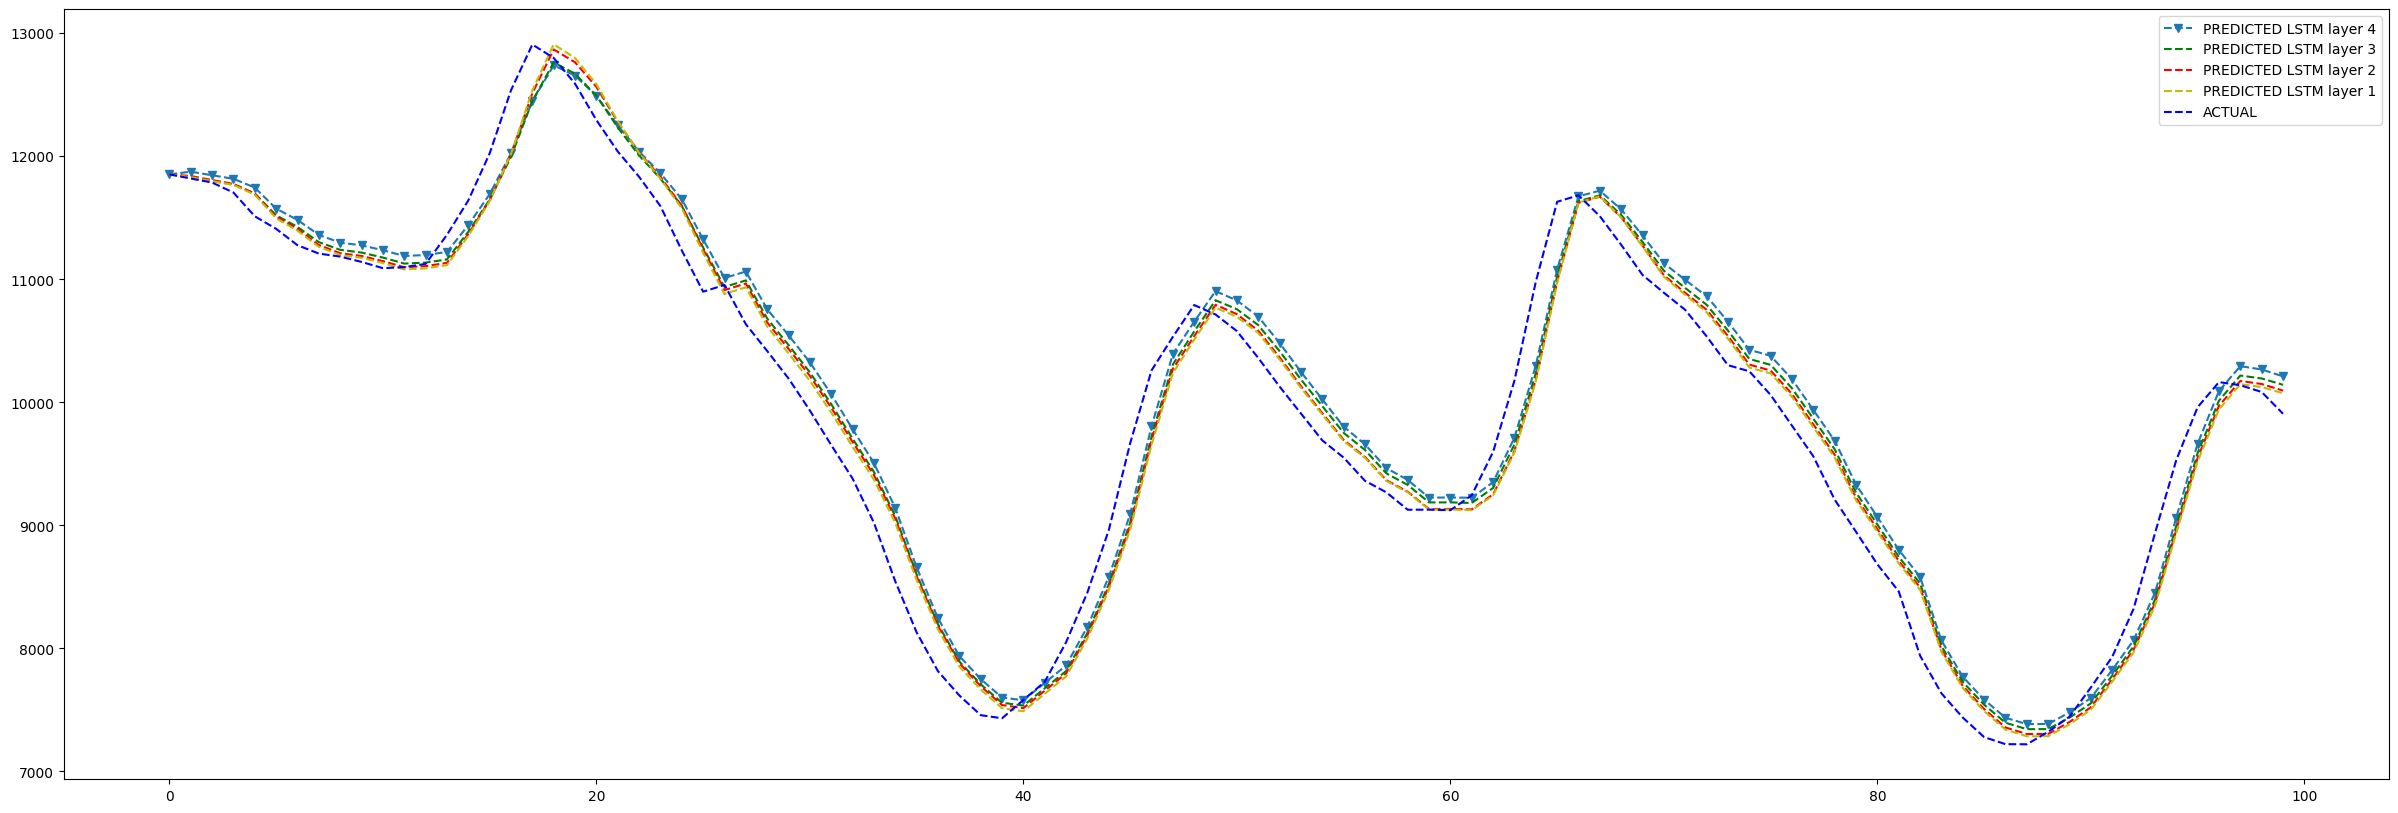

In [ ]:
pyplot.figure(figsize=(30,10))
pyplot.plot(vals_lstm_4[:100],'v--',label="PREDICTED LSTM layer 4")
pyplot.plot(vals_lstm[:100],'g--',label="PREDICTED LSTM layer 3")
pyplot.plot(vals_lstm_2[:100],'r--',label="PREDICTED LSTM layer 2")
pyplot.plot(vals_lstm_1[:100],'y--',label="PREDICTED LSTM layer 1")
pyplot.plot(act_vals[:100],'b--',label="ACTUAL")
pyplot.legend()
pyplot.show()

In [ ]:
# mape_lstm = sqrt(mean_absolute_percentage_error(vals_lstm, act_vals))
# mae_lstm = mean_absolute_error(act_vals, vals_lstm)
# mse_lstm = mean_squared_error(act__vals, vals_lstm, squared=False)
# print("mape_model_lstm: ", mean_absolute_percentage_error(actual_lstm, predicted_lstm))

# mape_gru = sqrt(mean_absolute_percentage_error(vals_gru, act_vals))
# mae_gru = mean_absolute_error(act_vals, vals_gru)
# mse_gru = mean_squared_error(act_vals, vals_gru, squared=False)
# print("mape_model_gru: ", mean_absolute_percentage_error(actual_gru, predicted_gru))